In [ ]:
!pip install lime
!pip install seaborn
!pip install lifelines

Sex values as string: Male      5819
Female    1395
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


SEX VALUES AS BINARY: 0    5819
1    1395
Name: sex, dtype: int64
CHARGE VALUES AS STRING:  F    4666
M    2548
Name: c_charge_degree, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CHARGE VALUES AS BINARY:  1    4666
0    2548
Name: c_charge_degree, dtype: int64
7214
last date of modified dataset:  2014-03-31 length of compas:  6207
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
6207
MEAN OF SCALED DATA:  [ 5.03687456e-17  2.24369867e-16  4.35002803e-17  2.63291170e-17
  2.51843728e-17 -5.17996758e-17]
STANDARD DEVIATION OF SCALED DATA [1. 1. 1. 1. 1. 1.]
6207
7214
Null values:  False Sum:  sex                0
age                0
juv_fel_count      0
juv_misd_count     0
priors_count       0
c_charge_degree    0
dtype: int64
Index(['sex', 'age', 'juv_fel_count', 'juv_misd_count', 'priors_count',
       'c_charge_degree'],
      dtype='object')
[62.32, 66.67, 61.67, 63.69, 65.62, 66.43, 56.92, 56.36, 64.98, 58.7, 64.01, 66.75, 64.98, 65.06, 65.7, 62.16, 65.78, 67.63, 62.24, 62.64, 61.11, 59.98, 66.1, 57.73, 63.04, 67.55, 62.72, 64.49, 62.72, 56.9

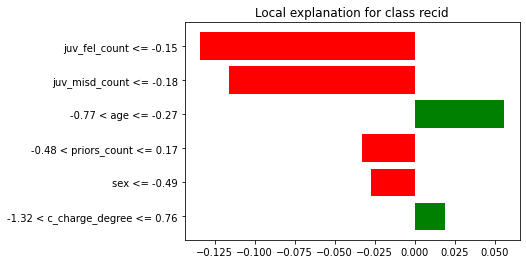

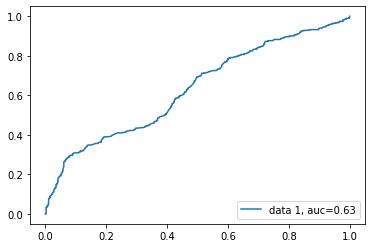

Mean validation accuracy/loss:  62.92799 stddev:  3.0146114276801916 Confidence Interval:  0.18684755208809092


In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
import pickle
import datetime
from datetime import timedelta
import scipy.stats as st
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

compas = pd.read_csv("compas-scores-two-years.csv")

predict = 'is_recid'
total = len(compas)
#Encode sex values
print("Sex values as string:", compas['sex'].value_counts())
for i in range(total):
  if compas['sex'][i] == 'Male':
    compas['sex'][i] = 0
  if compas['sex'][i] == 'Female':
    compas['sex'][i] = 1
print("SEX VALUES AS BINARY:",compas['sex'].value_counts())
#Encode charge degree values
print("CHARGE VALUES AS STRING: ", compas['c_charge_degree'].value_counts())
for i in range(total):
  if compas['c_charge_degree'][i] == 'M':
    compas['c_charge_degree'][i] = 0
  if compas['c_charge_degree'][i] == 'F':
    compas['c_charge_degree'][i] = 1
print("CHARGE VALUES AS BINARY: ", compas['c_charge_degree'].value_counts())

print(total)
for i in range(len(compas)):
  if pd.to_datetime(compas["compas_screening_date"][i]) >= datetime.datetime(2014, 4, 1):
    compas = compas.drop([i])
print("last date of modified dataset: ", compas["compas_screening_date"].max(), "length of compas: ", len(compas))

compasfeat = compas.drop(['id', 'name', 'first', 'last','race','decile_score', 'juv_other_count','v_decile_score','compas_screening_date','dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out',
                        'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas','c_charge_desc', 'r_case_number','r_charge_degree','is_recid',
                        'r_days_from_arrest', 'r_offense_date','r_charge_desc', 'r_jail_in','r_jail_out','is_violent_recid','two_year_recid', 'priors_count.1',
                        'decile_score.1','vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment','score_text', 
                        'screening_date', 'v_type_of_assessment', 'v_score_text', 'v_screening_date', 'violent_recid', 'in_custody','out_custody','start','end','event'], axis=1)

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())
print(len(compasfeat))

x = np.array(compasfeat)
y = np.array(compas[predict])



scaler = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

epochs= 1000
print("MEAN OF SCALED DATA: ", x.mean(axis=0))
print("STANDARD DEVIATION OF SCALED DATA", x.std(axis=0))
print(len(compasfeat))

print(total)

print("Null values: ", compasfeat.isnull().values.any(), "Sum: ", compasfeat.isnull().sum())

print(compasfeat.columns)
svmaccuracies= []
for _ in range(1000):
    x_train3, x_test3, y_train3, y_test3 = sklearn.model_selection.train_test_split(x, y, test_size=.20)
    clf= svm.NuSVC(gamma='auto', probability=True)
    clf.fit(x_train3, y_train3)
    svmacc =clf.score(x_test3, y_test3)
    svmacc = round(svmacc*100, 2)
    svmaccuracies.append(svmacc)

modifiedSVM = 'modifiedSVM.sav'
pickle.dump(clf, open(modifiedSVM, 'wb'))
"""#open saved model
openmodifiedSVM = pickle.load(open("modifiedSVM.sav", "rb"))
#results"""

print(svmaccuracies)
svmmeans = np.mean(svmaccuracies, 0)
svmstds = np.std(svmaccuracies, 0)
svmci95 = 1.96*svmstds/np.sqrt(epochs)

i = 66

print("prisoner information:\n", x_test3[i],y_test3[i])
#SVM confusion matric

svm_matrix = confusion_matrix(y_test3, clf.predict(x_test3), normalize='all')
explainer3 = lime.lime_tabular.LimeTabularExplainer(x_train3, mode='classification', feature_names = compasfeat.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')

print("\nSupport vector machine accuracy: ", svmacc, "\nprediction: ", clf.predict(x_test3[i].reshape(1, -1)), "\nPredict probability: ", clf.predict_proba(x_test3[i].reshape(1, -1)), "\nConfusion Matrix:\n", svm_matrix)

print("Support Vector Machine: \n")
svmexp = explainer3.explain_instance(x_test3[i], clf.predict_proba, num_features=len(compasfeat.columns))
#svmexp.show_in_notebook(show_table=True)
svmimg = svmexp.as_pyplot_figure()
svmimg.savefig('modifiedSVMexp', format='pdf',bbox_inches='tight')
plt.show()


y_pred_proba = clf.predict_proba(x_test3)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test3,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test3, y_pred_proba),2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig('modifiedsvmAUC.pdf', format='pdf',bbox_inches='tight')
plt.show()

print("Mean validation accuracy/loss: ", svmmeans, "stddev: ", svmstds, "Confidence Interval: ",svmci95)